# Loan Prediction

 ## Understanding Factors Influencing Loan Approvals

This project aims to explore a dataset of loan applpication to predict wether a loan will be approved based on various factors.
Target variable: **Loan Status**

### Setup and Libraries

Importing the neccesary libraries for data visualization and analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Setting global plot style
sns.set(style="whitegrid")


### Data Overview

In [1]:
import pandas as pd
df = pd.read_csv("loan_data.csv")

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [2]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Numbers in the second column reports how many entries have no value in them in each column

**Missing Entries as a Percentage:**
- Gender: **2.11%**
- Married: **0.49%**
- Dependents: **2.44%**
- Self_Employed: **5.20%**
- LoanAmount: **3.58%**
- Loan_Amount_Term: **2.28%**
- Credit_History: **8.13%**

To visualize missing values I used a **Missingness Matrix(Top)** and a **Missingness Heatmap(Bottom)**

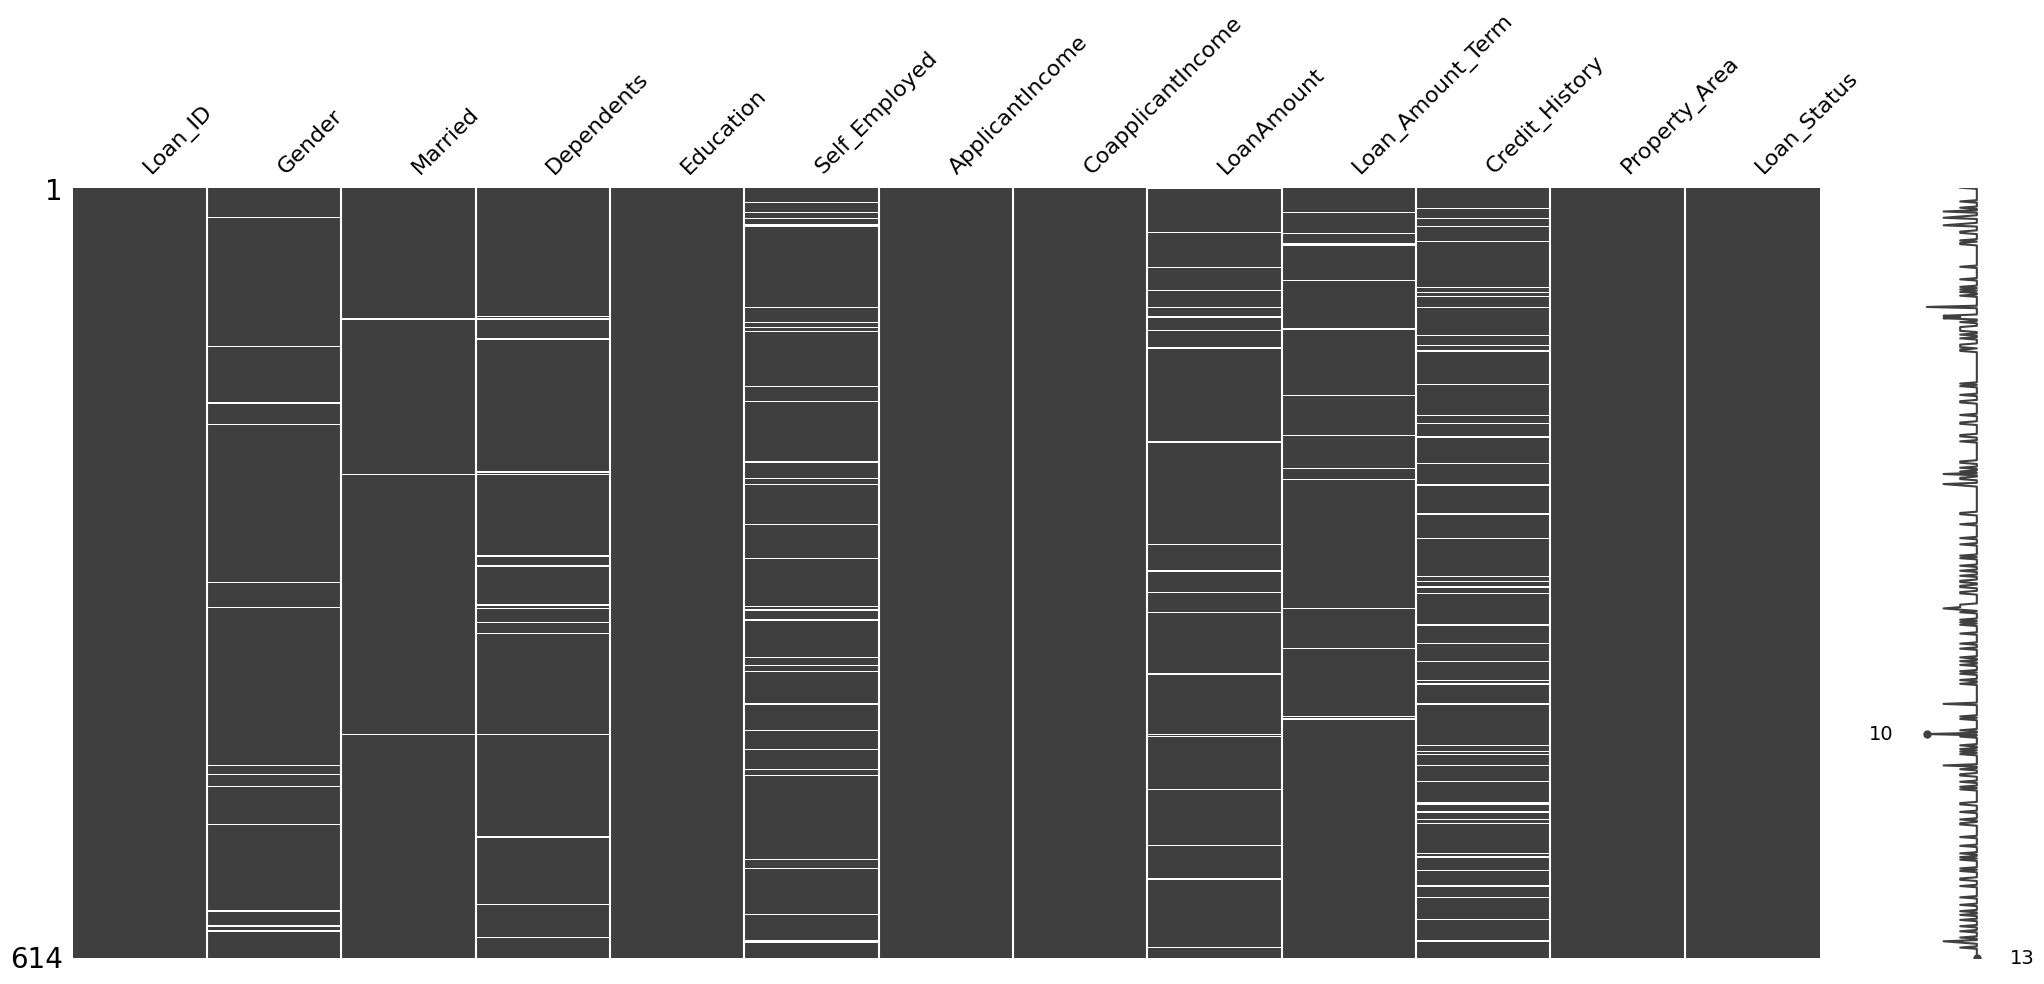

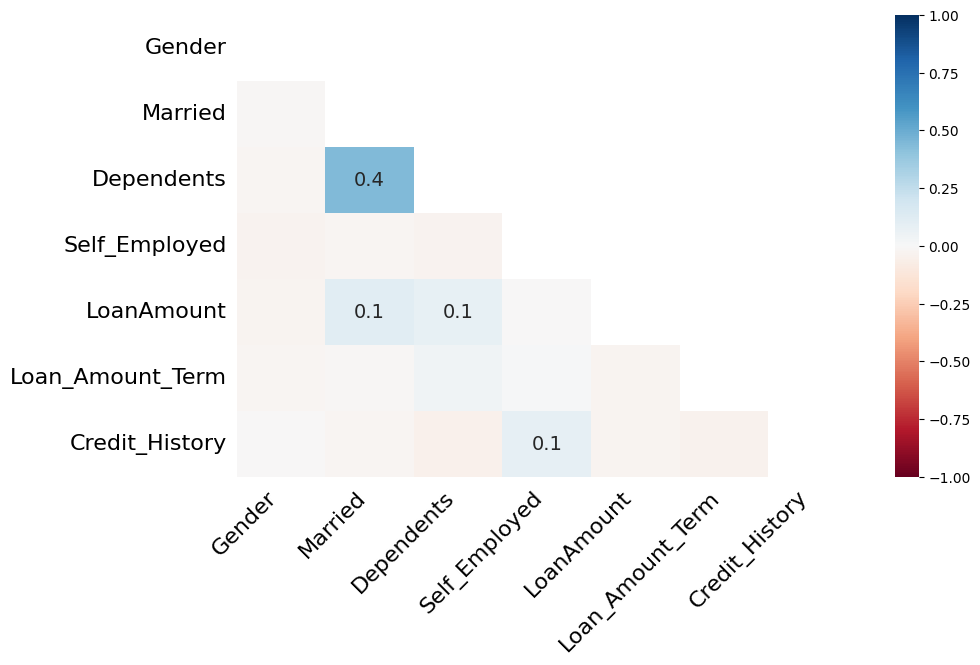

In [5]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missingness
msno.matrix(df)
plt.show()

# Heatmap for missingness
msno.heatmap(df, figsize=(10, 6))
plt.show()


The darker blue spot indicates a high correlation between the two categories: Married and Dependents. Which logically makes sense because if you are married you are more likely to have kids, increasing the number of dependents.

Because the Married and Dependents columns depend on each other imputing missing values would not work

For other categorical columns:
- Gender
- Self_Employed
- Credit_History

I replaced the missing values in categorical columns with the mode

For numerical columns:
- LoanAmount
- Loan_Amount_Term

I replaced the missing values with the median

In [5]:
import pandas as pd
df = pd.read_csv("loan_data.csv")
categorical_cols = ['Gender', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


## Exploratory Data Analysis

### Relationship Between Marriage and Dependents

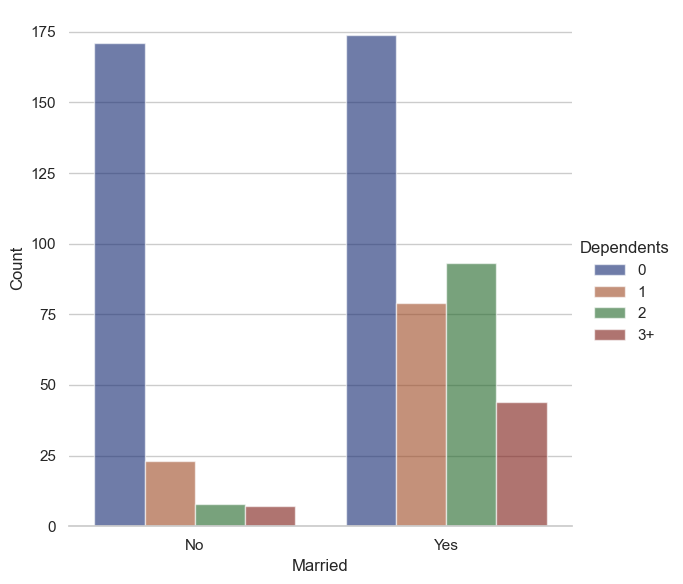

In [7]:
import seaborn as sns
sns.set_theme(style="whitegrid")
df = pd.read_csv("loan_data.csv")

g = sns.catplot(
    data=df, kind="count",
    x="Married", hue="Dependents",
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Married", "Count")
g.legend.set_title("Dependents")

**Observations**
-  Most individuals with no dependents are represented under both married and unmarried categories
- Married individuals show a more even distributionn across dependent categories(0,1,2,3) compared to unmarried individuals.

### Distribution of Categorical Columns

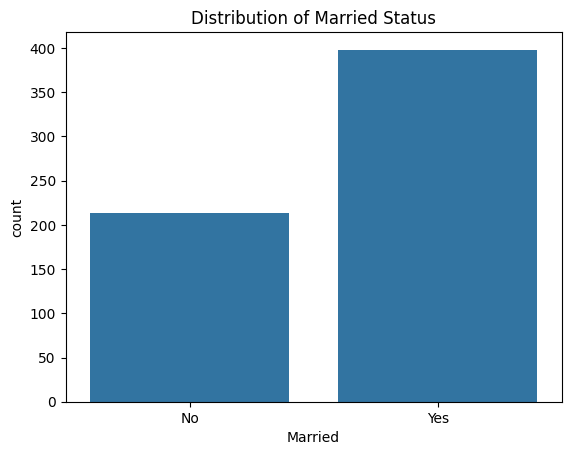

Married
Yes    398
No     213
Name: count, dtype: int64


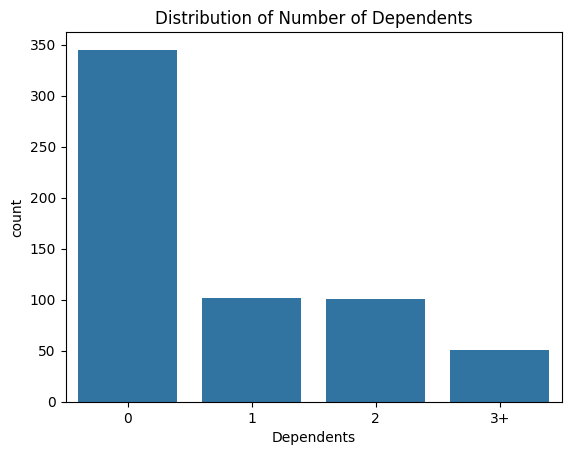

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


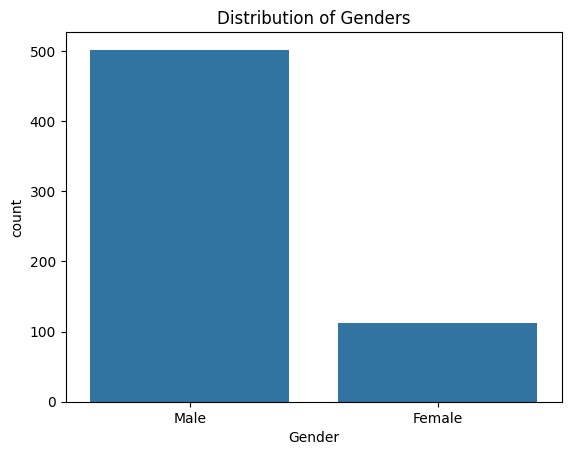

Gender
Male      502
Female    112
Name: count, dtype: int64


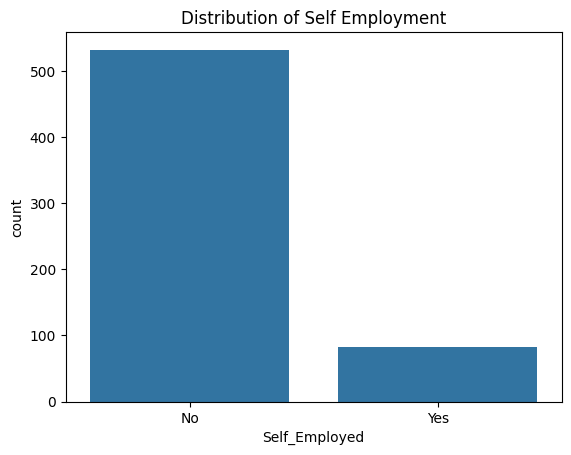

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


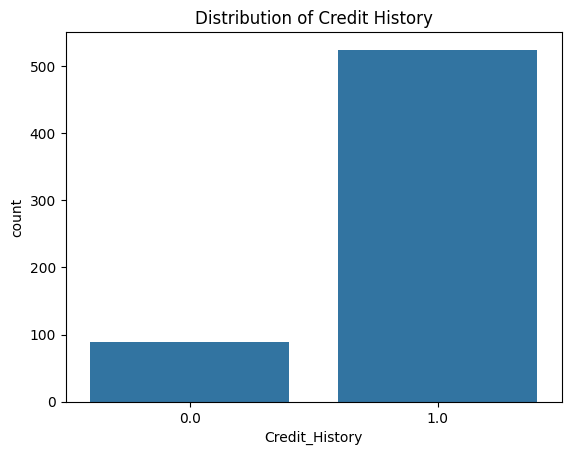

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


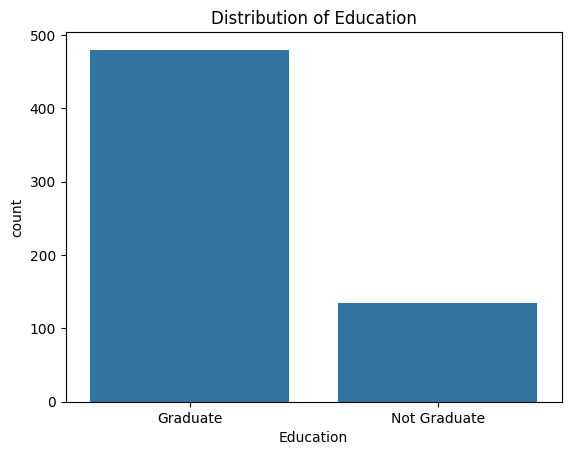

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


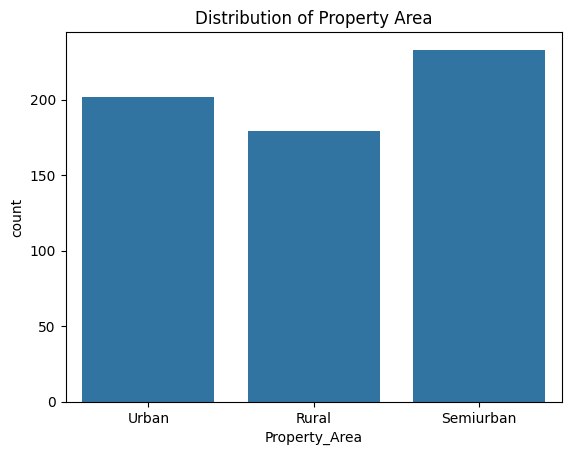

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv("loan_data.csv")
categorical_cols = ['Gender', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())
#Married Section

# Create the plot
sns.countplot(data=df, x='Married')
# Set the title
plt.title("Distribution of Married Status")
# Show the plot
plt.show()
print(df['Married'].value_counts())

#Dependents Section
sns.countplot(data=df, x='Dependents')
plt.title("Distribution of Number of Dependents")
plt.show()

print(df['Dependents'].value_counts())

# Gender Section
sns.countplot(data=df, x='Gender')
plt.title("Distribution of Genders")
plt.show()

print(df['Gender'].value_counts())

#Self employed section
sns.countplot(data=df, x='Self_Employed')
plt.title("Distribution of Self Employment")
plt.show()

print(df['Self_Employed'].value_counts())

#Credit History section
sns.countplot(data=df, x='Credit_History')
plt.title("Distribution of Credit History")
plt.show()

print(df['Credit_History'].value_counts())


#Education section
sns.countplot(data=df, x='Education')
plt.title("Distribution of Education")
plt.show()

print(df['Education'].value_counts())

#Property section
sns.countplot(data=df, x='Property_Area')
plt.title("Distribution of Property Area")
plt.show()

print(df['Property_Area'].value_counts())

### Distribution of Numerical Columns

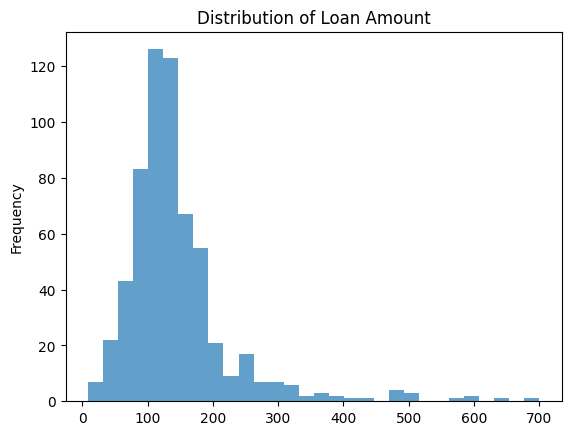

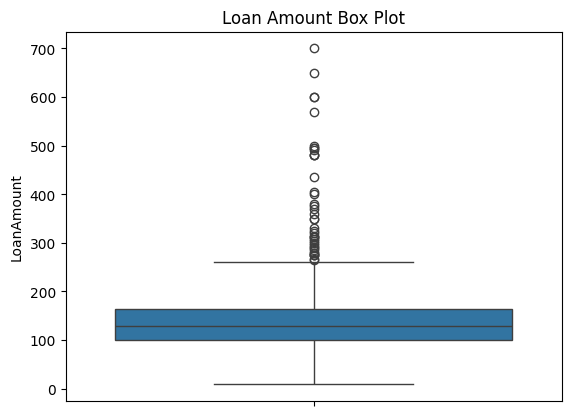

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64


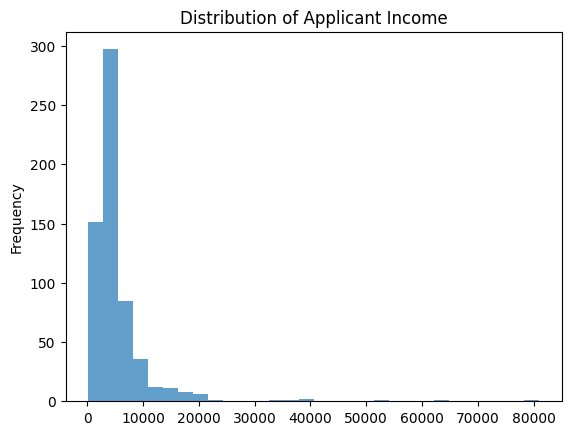

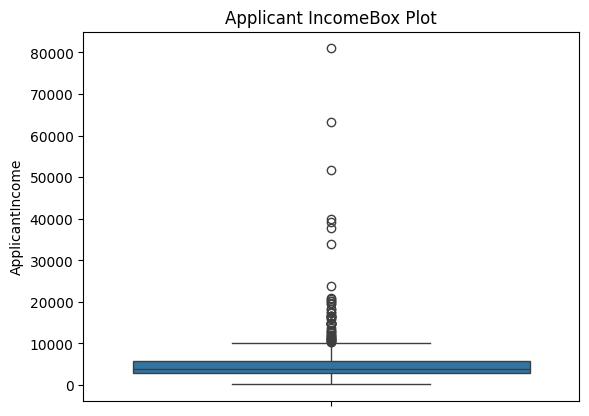

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


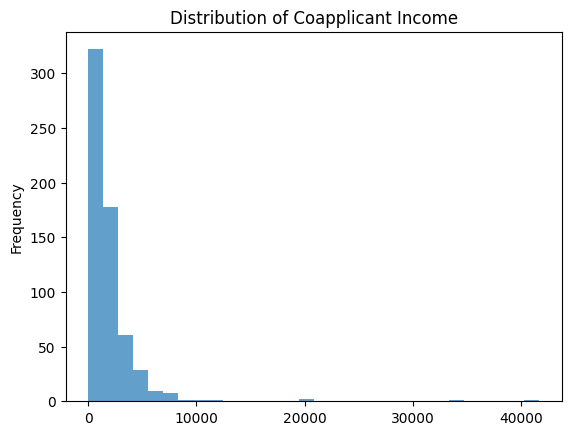

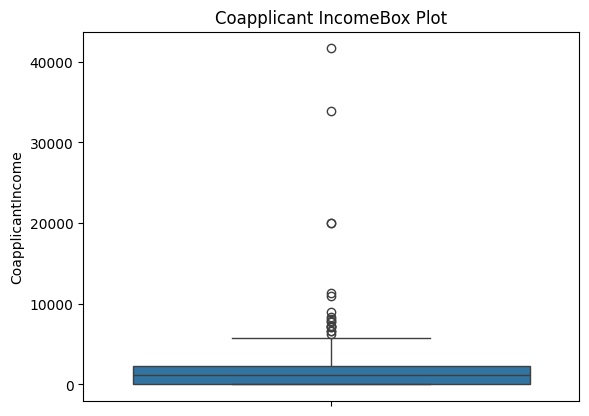

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv("loan_data.csv")
categorical_cols = ['Gender', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

#Loan Amount Distribution
df['LoanAmount'].plot(kind='hist', bins=30, alpha=0.7)
plt.title("Distribution of Loan Amount")
plt.show()

sns.boxplot(data=df, y='LoanAmount')
plt.title("Loan Amount Box Plot")
plt.show()
print(df['LoanAmount'].describe())

#Applicant Income
df['ApplicantIncome'].plot(kind='hist', bins=30, alpha=0.7)
plt.title("Distribution of Applicant Income")
plt.show()

sns.boxplot(data=df, y='ApplicantIncome')
plt.title("Applicant IncomeBox Plot")
plt.show()
print(df['ApplicantIncome'].describe())

#Coapplicant Income
df['CoapplicantIncome'].plot(kind='hist', bins=30, alpha=0.7)
plt.title("Distribution of Coapplicant Income")
plt.show()

sns.boxplot(data=df, y='CoapplicantIncome')
plt.title("Coapplicant IncomeBox Plot")
plt.show()
print(df['CoapplicantIncome'].describe())


### Loan Amount

**Statistics Explanation**

Count:
- There are 614 non-missing values in the LoanAmount column.

Mean (Average):
- The average loan amount is approximately 145.75.

Standard Deviation (std):
- The standard deviation is 84.11, which indicates a high variability in loan amounts.

Minimum (min):
- The smallest loan amount is 9.0.

25th Percentile (Q1):
- 25% of the loans are less than or equal to 100.25.

50th Percentile (Median):
- The median loan amount is 128.0, meaning half of the loans are below this value.

75th Percentile (Q3):
- 75% of the loans are less than or equal to 164.75.

Maximum (max):
- The largest loan amount is 700.0.


The mean (145.75) is greater than the median (128.0), indicating that the data is right-skewed. This matches the box plot, where there are outliers on the higher end.



To handle outliers i applied a **Log Transformation** to reduce the impact of outliers

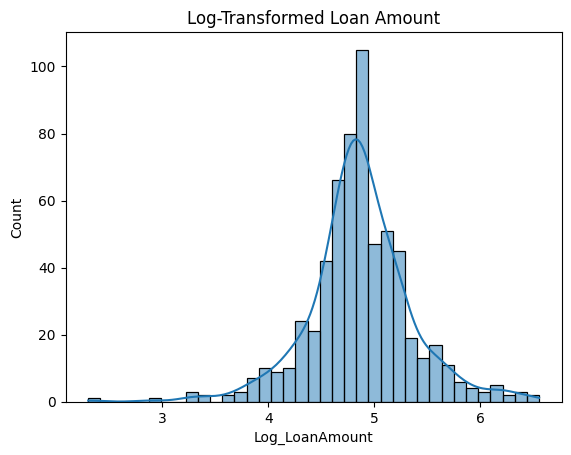

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv("loan_data.csv")
categorical_cols = ['Gender', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Log transform LoanAmount
df['Log_LoanAmount'] = np.log1p(df['LoanAmount'])

# Check distribution
sns.histplot(df['Log_LoanAmount'], kde=True)
plt.title("Log-Transformed Loan Amount")
plt.show()


### Applicant Income

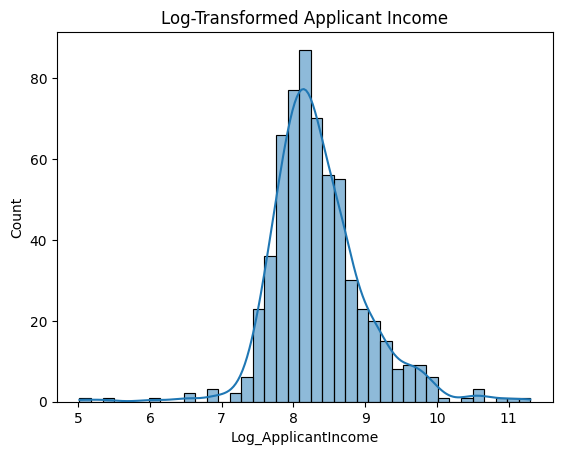

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv("loan_data.csv")
categorical_cols = ['Gender', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Log transform Applicant Income
df['Log_ApplicantIncome'] = np.log1p(df['ApplicantIncome'])

# Check distribution
sns.histplot(df['Log_ApplicantIncome'], kde=True)
plt.title("Log-Transformed Applicant Income")
plt.show()


### Coapplicant Income

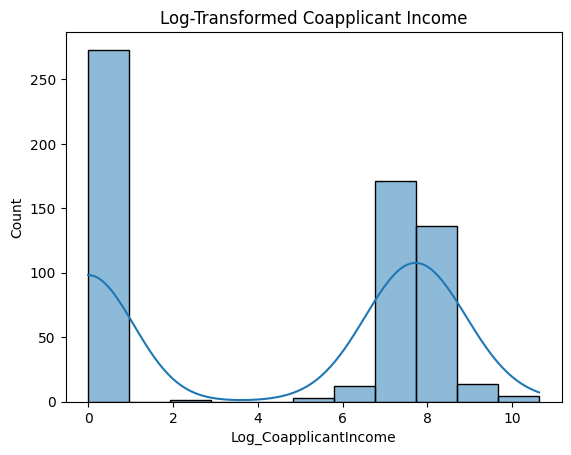

Number of coapplicants with zero income: 273


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv("loan_data.csv")
categorical_cols = ['Gender', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Log transform Applicant Income
df['Log_CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

# Check distribution
sns.histplot(df['Log_CoapplicantIncome'], kde=True)
plt.title("Log-Transformed Coapplicant Income")
plt.show()

zero_income_count = (df['CoapplicantIncome'] == 0).sum()
print(f"Number of coapplicants with zero income: {zero_income_count}")


The plot for the log transformation of the distribution of coapplicant income has an unusual pattern with two distinct peaks

### Distribution of Loan Status

Loan_Status
Y    422
N    192
Name: count, dtype: int64


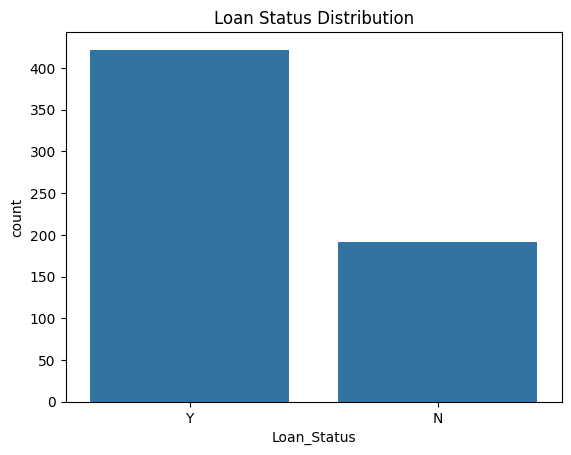

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv("loan_data.csv")
categorical_cols = ['Gender', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

print(df['Loan_Status'].value_counts())
sns.countplot(data=df, x='Loan_Status')
plt.title("Loan Status Distribution")
plt.show()


### Categories Compared with Loan Status

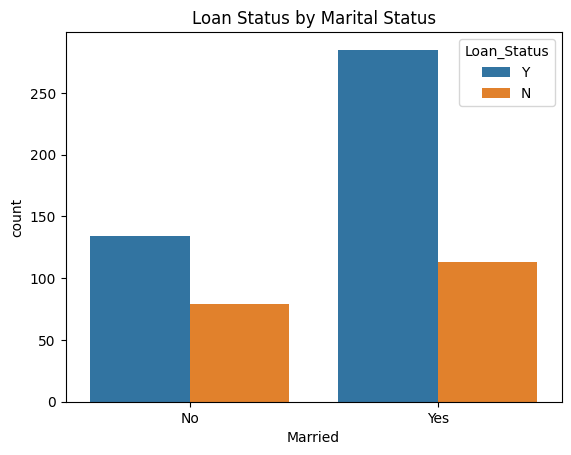

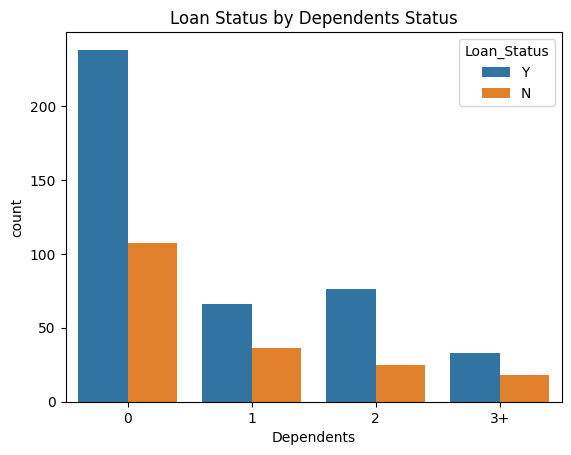

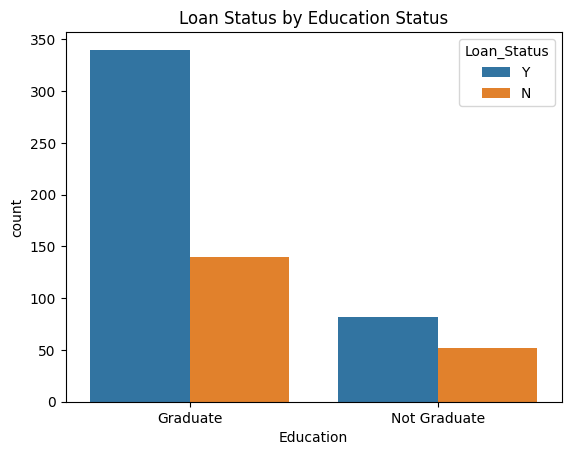

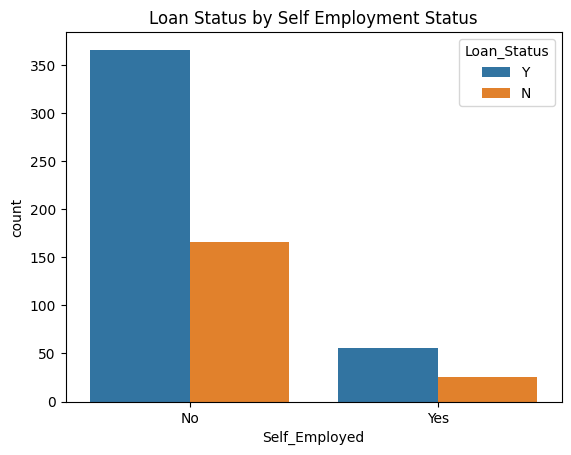

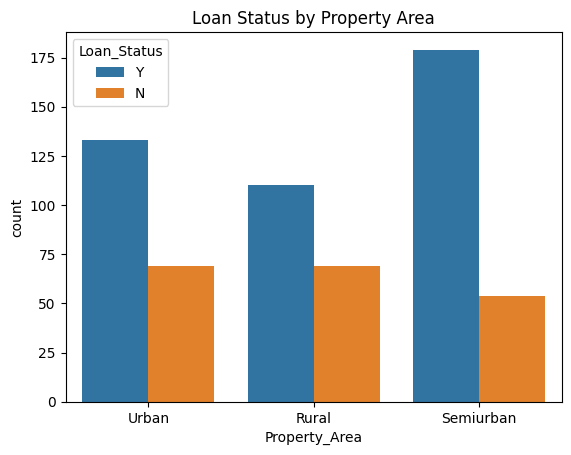

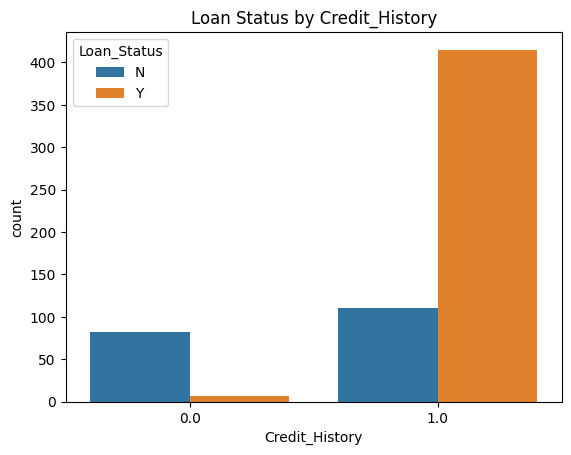

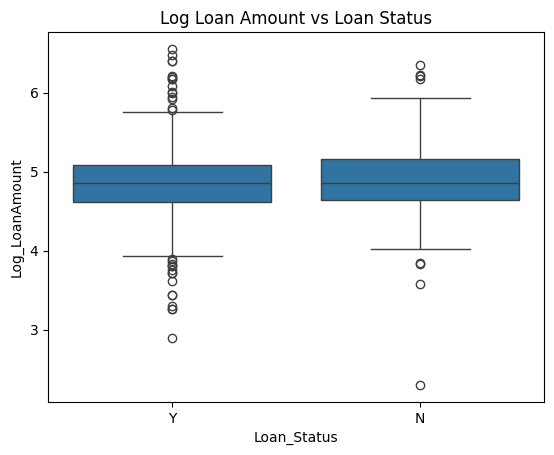

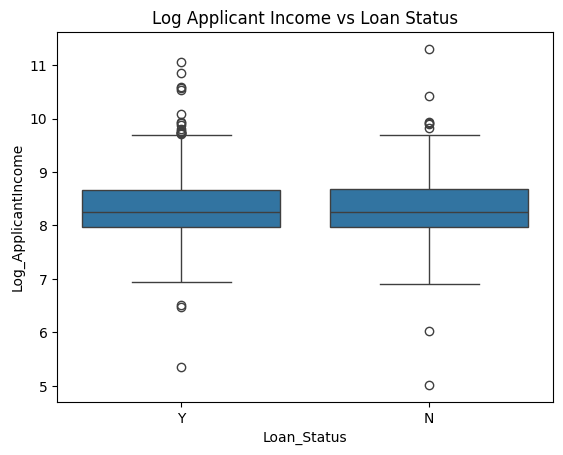

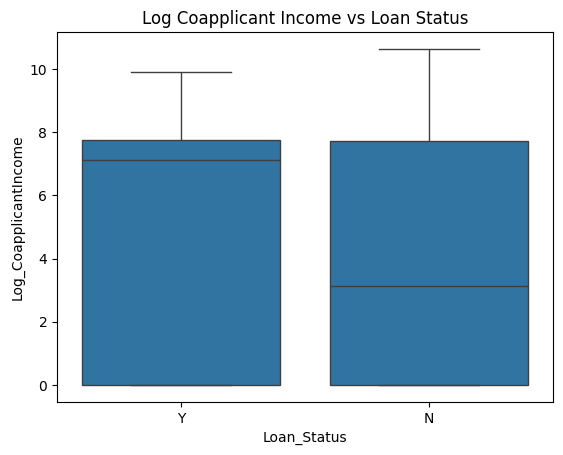

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv("loan_data.csv")
categorical_cols = ['Gender', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

#Marital Stauts
sns.countplot(data=df, x='Married', hue='Loan_Status')
plt.title("Loan Status by Marital Status")
plt.show()

#Dependents Status
sns.countplot(data=df, x='Dependents', hue='Loan_Status')
plt.title("Loan Status by Dependents Status")
plt.show()

# Education Status
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title("Loan Status by Education Status")
plt.show()

# Self Employed Status
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')
plt.title("Loan Status by Self Employment Status")
plt.show()

# Property Area Status
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')
plt.title("Loan Status by Property Area")
plt.show()

# Credit History Status
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')
plt.title("Loan Status by Credit_History")
plt.show()

# Loan Amount Status
df['Log_LoanAmount'] = np.log1p(df['LoanAmount'])
sns.boxplot(data=df, x='Loan_Status', y='Log_LoanAmount')
plt.title("Log Loan Amount vs Loan Status")
plt.show()

# Applicant Income Status
df['Log_ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
sns.boxplot(data=df, x='Loan_Status', y='Log_ApplicantIncome')
plt.title("Log Applicant Income vs Loan Status")
plt.show()

# Coapplicant Income Status
df['Log_CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
sns.boxplot(data=df, x='Loan_Status', y='Log_CoapplicantIncome')
plt.title("Log Coapplicant Income vs Loan Status")
plt.show()

### Key Insights from the Categorical Comparisons
**Loan Status by Marital Status:**
- Married applicants are more likely to have their loans approved compared to unmarried applicants.
- The count of approvals (Y) is significantly higher for married individuals.

**Loan Status by Dependents:**
- Applicants with 0 dependents have the highest number of loan approvals.
- As the number of dependents increases (especially 3+), loan approvals (Y) decrease slightly.

**Loan Status by Education:**
- Graduates are more likely to have their loans approved compared to non-graduates.
- The discrepancy between approval (Y) and rejection (N) is larger for graduates.

**Loan Status by Self-Employment:**
- Applicants who are not self-employed have a higher rate of loan approvals compared to those who are self-employed.

**Loan Status by Property Area:**
- Semiurban areas have the highest approval rate, followed by urban areas.
- Rural areas have relatively fewer approvals and a more balanced approval-rejection ratio.

**Loan Status by Credit History:**
- Applicants with a positive credit history (1.0) overwhelmingly receive loan approvals.
- Applicants with no or bad credit history (0.0) have a much higher rejection rate.

### Key Insights from the Numerical Comparisons
**Log Loan Amount vs. Loan Status:**
- The median loan amount (log-transformed) is similar for both approved and rejected loans.
- This suggests that LoanAmount alone does not have a strong impact on Loan_Status.

**Log Applicant Income vs. Loan Status:**
- The median applicant income (log-transformed) is also similar between approvals and rejections.
- Outliers with high incomes exist in both categories, indicating that income alone may not be a deciding factor.

**Log Coapplicant Income vs. Loan Status:**
- Coapplicant income does not show a strong relationship with loan approval.
- A large proportion of coapplicants have zero income, which appears similar for both approvals and rejections.


### Overall Observations
- Credit History stands out as the most critical feature for loan approval, as applicants with a positive credit history are far more likely to be approved.
- Categorical features like Married, Education, and Property_Area show clear differences in loan approval rates, making them valuable predictors.
- Numerical features like ApplicantIncome and LoanAmount don’t exhibit strong individual relationships with Loan_Status. However, they may contribute in combination with other variables.

### Data Preprocessing

#### Converting Categorical data into numerical using one hot encoding

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv("loan_data.csv")
categorical_cols = ['Gender', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())
    
# Convert categorical data into numerical using one hot encoding
df = pd.get_dummies(df, columns=['Married', 'Education', 'Self_Employed'], drop_first=True)
print(df)


      Loan_ID  Gender Dependents  ApplicantIncome  CoapplicantIncome  \
0    LP001002    Male          0             5849                0.0   
1    LP001003    Male          1             4583             1508.0   
2    LP001005    Male          0             3000                0.0   
3    LP001006    Male          0             2583             2358.0   
4    LP001008    Male          0             6000                0.0   
..        ...     ...        ...              ...                ...   
609  LP002978  Female          0             2900                0.0   
610  LP002979    Male         3+             4106                0.0   
611  LP002983    Male          1             8072              240.0   
612  LP002984    Male          2             7583                0.0   
613  LP002990  Female          0             4583                0.0   

     LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  \
0         128.0             360.0             1.0       

#### Feature scailing

Feature scailing using standardization 

In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv("loan_data.csv")
categorical_cols = ['Gender', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())
    


# Define the columns that need scaling
scale_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Print scaled dataset
print(df.head())

df[scale_cols].describe()


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487   -0.211241             360.0   
1        -0.134412          -0.038732   -0.211241             360.0   
2        -0.393747          -0.554487   -0.948996             360.0   
3        -0.462062           0.251980   -0.306435             360.0   
4         0.097728          -0.554487   -0.056551             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,6.140000e+02,6.140000e+02,6.140000e+02
mean,-4.339634e-18,4.050325e-17,-2.603780e-17
std,1.000815e+00,1.000815e+00,1.000815e+00
min,-8.606493e-01,-5.544873e-01,-1.627255e+00
25%,-4.138159e-01,-5.544873e-01,-5.414462e-01
50%,-2.606393e-01,-1.480047e-01,-2.112412e-01
75%,6.414426e-02,2.312023e-01,2.260572e-01
max,1.238462e+01,1.369617e+01,6.595146e+00


### Loan Approval Prediction Model using Logistic Regression

This section of the notebook builds a Loan Approval Prediction Model using Logistic Regression. The model predicts whether a loan will be approved (Loan_Status) based on various applicant details such as income, loan amount, credit history, and employment status.

Key Steps:
- Data Preprocessing:
Handle missing values by filling categorical features with the mode and numerical features with the median.
Convert categorical variables into numerical values using One-Hot Encoding.
Standardize numerical features using StandardScaler to improve model performance.

- Model Training:
Split the dataset into 80% training and 20% testing.
Train a Logistic Regression model on the processed data.

- Evaluation:
Calculate model accuracy to assess performance.
Generate a classification report with precision, recall, and F1-score for detailed insights.

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("loan_data.csv")

# Handle missing values
# Fill categorical columns with mode (most common value)
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Dependents']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  

# Fill numerical columns with median
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Fix the 'Dependents' column (convert '3+' to integer 3)
df['Dependents'] = df['Dependents'].replace({'3+': 3}).astype(int)

# Encode the target variable (Loan_Status: 'Y' -> 1, 'N' -> 0)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Convert categorical features into numerical using One-Hot Encoding
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Drop Loan_ID (not useful for predictions)
df.drop(columns=['Loan_ID'], inplace=True)

# Define feature set (X) and target variable (y)
X = df.drop(columns=['Loan_Status'])  # Features
y = df['Loan_Status']  # Target

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling: Standardize numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



The Logistic Regression model achieved 78.86% accuracy, performing well in predicting loan approvals but struggling with correctly identifying loan denials. While the model correctly classifies 99% of approved loans, it only identifies 42% of actual denials, leading to a high false positive rate. Further improvements, such as handling class imbalance or trying alternative models, may help improve predictions for loan denials.